2019-05-19 10:30:05 
* https://glowingpython.blogspot.com
* https://github.com/rougier/matplotlib-tutorial

In [1]:
import numpy as np
import pandas as pd

In [2]:
%matplotlib inline 

In [3]:
import matplotlib.pyplot as plt

In [4]:
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

In [5]:
import matplotlib
matplotlib.rcParams.update({'font.size':18})
matplotlib.rcParams.update({'font.family':'serif'})

In [ ]:
import datetime
import random

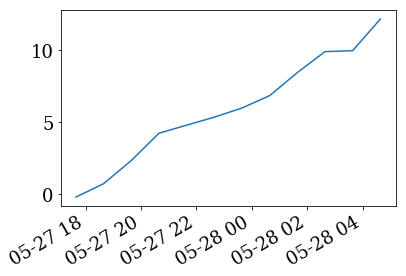

In [12]:
# make up some data
x = [datetime.datetime.now() + datetime.timedelta(hours=i) for i in range(12)]
y = [i+random.gauss(0,1) for i,_ in enumerate(x)]

# plot
plt.plot(x,y)
# beautify the x-labels
plt.gcf().autofmt_xdate()

plt.show()

 40%|████      | 2/5 [00:00<00:00,  3.23it/s]/Users/wangmiao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: numpy.hypot

100%|██████████| 20/20 [01:29<00:00, 11.85s/it]


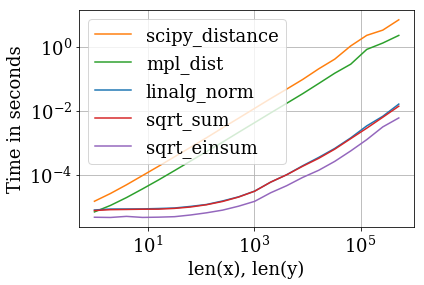

In [10]:
import matplotlib
import numpy
import perfplot
from scipy.spatial import distance


def linalg_norm(data):
    a, b = data
    return numpy.linalg.norm(a-b, axis=1)


def sqrt_sum(data):
    a, b = data
    return numpy.sqrt(numpy.sum((a-b)**2, axis=1))


def scipy_distance(data):
    a, b = data
    return list(map(distance.euclidean, a, b))


def mpl_dist(data):
    a, b = data
    return list(map(matplotlib.mlab.dist, a, b))


def sqrt_einsum(data):
    a, b = data
    a_min_b = a - b
    return numpy.sqrt(numpy.einsum('ij,ij->i', a_min_b, a_min_b))


perfplot.show(
    setup=lambda n: numpy.random.rand(2, n, 3),
    n_range=[2**k for k in range(20)],
    kernels=[linalg_norm, scipy_distance, mpl_dist, sqrt_sum, sqrt_einsum],
    logx=True,
    logy=True,
    xlabel='len(x), len(y)'
    )

In [ ]:
list(['a', 'b', 'c'])

In [ ]:
np.array(list(['a', 'b', 'c']))

In [ ]:
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.viridis)

plt.show()

# How to plot a function using matplotlib?

In [ ]:
mark = ['>', '*', 'x', 'd', '+']
tag = ['$\delta$ = 2','$\delta$ = 3','$\delta$ = 4','$\delta$ = 5','$\delta$ = 6']
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

x = np.linspace(-10.0, 10.0, 100)
y = 0.5*(np.exp(x) - np.exp(-x))


plt.plot(x, y, mark[1], label = "$y = 1/2(e^x-e^x)$")
plt.xlabel("x",fontdict = font)
plt.ylabel("y",fontdict = font)
plt.legend()

#plt.yscale('log')
plt.show()

In [ ]:

x = np.linspace(-10.0, 10.0, 100)
y = np.sinh(x)


plt.plot(x, y, mark[1], label = "$y = \sinh(x)$")
plt.xlabel("x",fontdict = font)
plt.ylabel("y",fontdict = font)
plt.legend()

#plt.yscale('log')
plt.show()

<span style="font-family:New York Times;font-size:1.2 em; color:green;">
Will module numpy replace module math? 

$$2(e^t-1)\displaystyle\sum_{n = 2}^{\infty} \frac{(-1)^{n+1}}{n(n^2-1)}e^{-n^2t}\sin nx$$

* https://glowingpython.blogspot.com/2011/04/how-to-plot-function-using-matplotlib.html

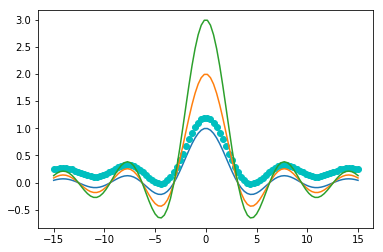

In [24]:
x = np.linspace(-15,15,100) # 100 linearly spaced numbers
y = np.sin(x)/x # computing the values of sin(x)/x

# compose plot
plt.plot(x,y) # sin(x)/x
plt.plot(x,y+0.2,'co') # same function with cyan dots
plt.plot(x,2*y,x,3*y) # 2*sin(x)/x and 3*sin(x)/x
plt.show() # show the plot

## [Writing mathmatical expression](https://matplotlib.org/users/mathtext.html)

# Interactive matplotlib

## How to make beautiful data visualizations in Python with matplotlib
[Advice from advanced user on Matplotlib](http://www.randalolson.com/2014/06/28/how-to-make-beautiful-data-visualizations-in-python-with-matplotlib/)
* Less is more attractive
* Less is more impactive

thanks to plot.ly, it only takes one more line of code to turn your matplotlib plot into an interactive.

##  Turn your matplotlib plot into an interactive.

In [1]:
import plotly # (*) To communicate with Plotly's server, sign in with credentials file
import plotly.plotly as py  # (*) Useful Python/Plotly tools
import plotly.tools as tls   # (*) Graph objects to piece together plots
from plotly.graph_objs import *
import numpy as np  # (*) numpy for math functions and arrays
import matplotlib.pyplot as plt # (*) import matplotlib
%matplotlib inline

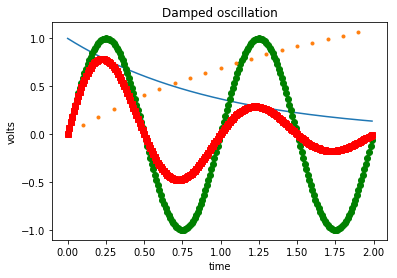

In [17]:
# Package all mpl plotting commands inside one function
def plot_mpl_fig():
    
    # Make two time arrays
    t1 = np.arange(0.0, 2.0, 0.1)
    t2 = np.arange(0.0, 2.0, 0.01)

    # N.B. .plot() returns a list of lines.  
    # The "l1, = plot" usage extracts the first element of the list 
    # into l1 using tuple unpacking.  
    # So, l1 is a Line2D instance, not a sequence of lines
    l1, = plt.plot(t2, np.exp(-t2), label='decaying exp.')
    l2, l3 = plt.plot(t2, np.sin(2 * np.pi * t2), '--go', 
                      t1, np.log(1 + t1), '.')
    l4, = plt.plot(t2, np.exp(-t2) * np.sin(2 * np.pi * t2), 'rs-.')

    # Add axis labels and title
    plt.xlabel('time')
    plt.ylabel('volts')
    plt.title('Damped oscillation')
    
    
    return (l1, l2, l3, l4)  # return line objects (for legend, later)

# Plot it!
plot_mpl_fig()

# N.B. get matplotlib figure object and assign a variable to it
mpl_fig1 = plt.gcf()

In [18]:
#send our matplotlib figure object to py.iplot_mpl, give it a file name as keyword argument l
py.iplot_mpl(mpl_fig1, filename='s6_damped_oscillation')

In [ ]:
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.tools as tls
import matplotlib.pylab as plt
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas

init_notebook_mode(connected=True)
fig = plt.Figure()
ax = fig.gca()
x = [-2,0,4,6,7]
y = [q**2-q+3 for q in x]
ax.plot(x,y)
canvas = FigureCanvas(fig)
plotly_fig = tls.mpl_to_plotly(fig)
py.iplot(plotly_fig)

#  Mandelbrot set

In [ ]:
"""
===================================
Shaded & power normalized rendering
===================================

The Mandelbrot set rendering can be improved by using a normalized recount
associated with a power normalized colormap (gamma=0.3). Rendering can be
further enhanced thanks to shading.

The `maxiter` gives the precision of the computation. `maxiter=200` should
take a few seconds on most modern laptops.
"""
import numpy as np


def mandelbrot_set(xmin, xmax, ymin, ymax, xn, yn, maxiter, horizon=2.0):
    X = np.linspace(xmin, xmax, xn, dtype=np.float32)
    Y = np.linspace(ymin, ymax, yn, dtype=np.float32)
    C = X + Y[:, None]*1j
    N = np.zeros(C.shape, dtype=int)
    Z = np.zeros(C.shape, np.complex64)
    for n in range(maxiter):
        I = np.less(abs(Z), horizon)
        N[I] = n
        Z[I] = Z[I]**2 + C[I]
    N[N == maxiter-1] = 0
    return Z, N


if __name__ == '__main__':
    import time
    import matplotlib
    from matplotlib import colors
    import matplotlib.pyplot as plt

    xmin, xmax, xn = -2.25, +0.75, 3000/2
    ymin, ymax, yn = -1.25, +1.25, 2500/2
    maxiter = 200
    horizon = 2.0 ** 40
    log_horizon = np.log(np.log(horizon))/np.log(2)
    Z, N = mandelbrot_set(xmin, xmax, ymin, ymax, xn, yn, maxiter, horizon)

    # Normalized recount as explained in:
    # https://linas.org/art-gallery/escape/smooth.html
    # https://www.ibm.com/developerworks/community/blogs/jfp/entry/My_Christmas_Gift

    # This line will generate warnings for null values but it is faster to
    # process them afterwards using the nan_to_num
    with np.errstate(invalid='ignore'):
        M = np.nan_to_num(N + 1 -
                          np.log(np.log(abs(Z)))/np.log(2) +
                          log_horizon)

    dpi = 72
    width = 10
    height = 10*yn/xn
    fig = plt.figure(figsize=(width, height), dpi=dpi)
    ax = fig.add_axes([0.0, 0.0, 1.0, 1.0], frameon=False, aspect=1)

    # Shaded rendering
    light = colors.LightSource(azdeg=315, altdeg=10)
    M = light.shade(M, cmap=plt.cm.hot, vert_exag=1.5,
                    norm=colors.PowerNorm(0.3), blend_mode='hsv')
    plt.imshow(M, extent=[xmin, xmax, ymin, ymax], interpolation="bicubic")
    ax.set_xticks([])
    ax.set_yticks([])

    # Some advertisement for matplotlib
    year = time.strftime("%Y")
    major, minor, micro = matplotlib.__version__.split('.', 2)
    text = ("The Mandelbrot fractal set\n"
            "Rendered with matplotlib %s.%s, %s - http://matplotlib.org"
            % (major, minor, year))
    ax.text(xmin+.025, ymin+.025, text, color="white", fontsize=12, alpha=0.5)

    plt.show()

Convert Mandelbrot figure into interactive display